In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# **1. Download the dataset and convert it into Dataframe**

In [5]:
# Download the dataset via link
!wget https://archive.ics.uci.edu/static/public/1134/beed:+bangalore+eeg+epilepsy+dataset.zip
# Unzip the dataset
!unzip beed:+bangalore+eeg+epilepsy+dataset.zip

--2025-11-24 12:49:10--  https://archive.ics.uci.edu/static/public/1134/beed:+bangalore+eeg+epilepsy+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 64:ff9b::80c3:afc, 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|64:ff9b::80c3:afc|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘beed:+bangalore+eeg+epilepsy+dataset.zip’

beed:+bangalore+eeg     [     <=>            ] 126.50K  88.2KB/s    in 1.4s    

2025-11-24 12:49:17 (88.2 KB/s) - ‘beed:+bangalore+eeg+epilepsy+dataset.zip’ saved [129534]

Archive:  beed:+bangalore+eeg+epilepsy+dataset.zip
  inflating: BEED_Data.csv           


In [3]:
# Load the csv as a dataframe
dataset = pd.read_csv('data/dataset/BEED_Data.csv')
# Display first 5 observations
dataset.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0


# **2. Exploratory Data Analysis (EDA)**

In [4]:
# Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      8000 non-null   int64
 1   X2      8000 non-null   int64
 2   X3      8000 non-null   int64
 3   X4      8000 non-null   int64
 4   X5      8000 non-null   int64
 5   X6      8000 non-null   int64
 6   X7      8000 non-null   int64
 7   X8      8000 non-null   int64
 8   X9      8000 non-null   int64
 9   X10     8000 non-null   int64
 10  X11     8000 non-null   int64
 11  X12     8000 non-null   int64
 12  X13     8000 non-null   int64
 13  X14     8000 non-null   int64
 14  X15     8000 non-null   int64
 15  X16     8000 non-null   int64
 16  y       8000 non-null   int64
dtypes: int64(17)
memory usage: 1.0 MB


The BEED dataset has 8000 observations and 17 features

In [5]:
# Statistics
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-1.490375,-2.189375,-3.23750,-4.119375,-1.821625,-2.311750,-3.398125,-3.448625,-1.647875,-2.56125,-3.524500,-4.782750,-2.164000,-2.910875,-4.355375,-4.113750,1.500000
std,36.824213,36.108088,35.80249,36.285268,37.621284,36.306006,36.358395,36.522214,38.107721,37.54068,37.343938,37.469582,38.144075,36.640555,36.242793,35.933601,1.118104
min,-281.000000,-255.000000,-255.00000,-257.000000,-264.000000,-277.000000,-277.000000,-260.000000,-290.000000,-302.00000,-276.000000,-306.000000,-288.000000,-290.000000,-323.000000,-317.000000,0.000000
25%,-7.000000,-7.000000,-7.00000,-10.000000,-10.000000,-8.000000,-8.000000,-7.000000,-7.000000,-8.00000,-8.000000,-11.000000,-10.000000,-8.000000,-9.000000,-6.000000,0.750000
50%,0.000000,0.000000,-1.00000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.00000,-1.000000,-2.000000,0.000000,0.000000,-2.000000,-1.000000,1.500000
75%,8.000000,8.000000,5.00000,7.000000,10.000000,8.000000,6.000000,5.000000,8.000000,8.00000,5.000000,7.000000,10.000000,9.000000,5.000000,4.000000,2.250000
max,252.000000,261.000000,238.00000,246.000000,249.000000,245.000000,220.000000,271.000000,280.000000,251.00000,262.000000,283.000000,296.000000,291.000000,251.000000,270.000000,3.000000


In [6]:
# Check for missing values
dataset.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

The dataset has no missing values

In [7]:
# Verify class imbalancity
dataset['y'].value_counts()

y
0    2000
1    2000
2    2000
3    2000
Name: count, dtype: int64

The distribution of the classes is balanced

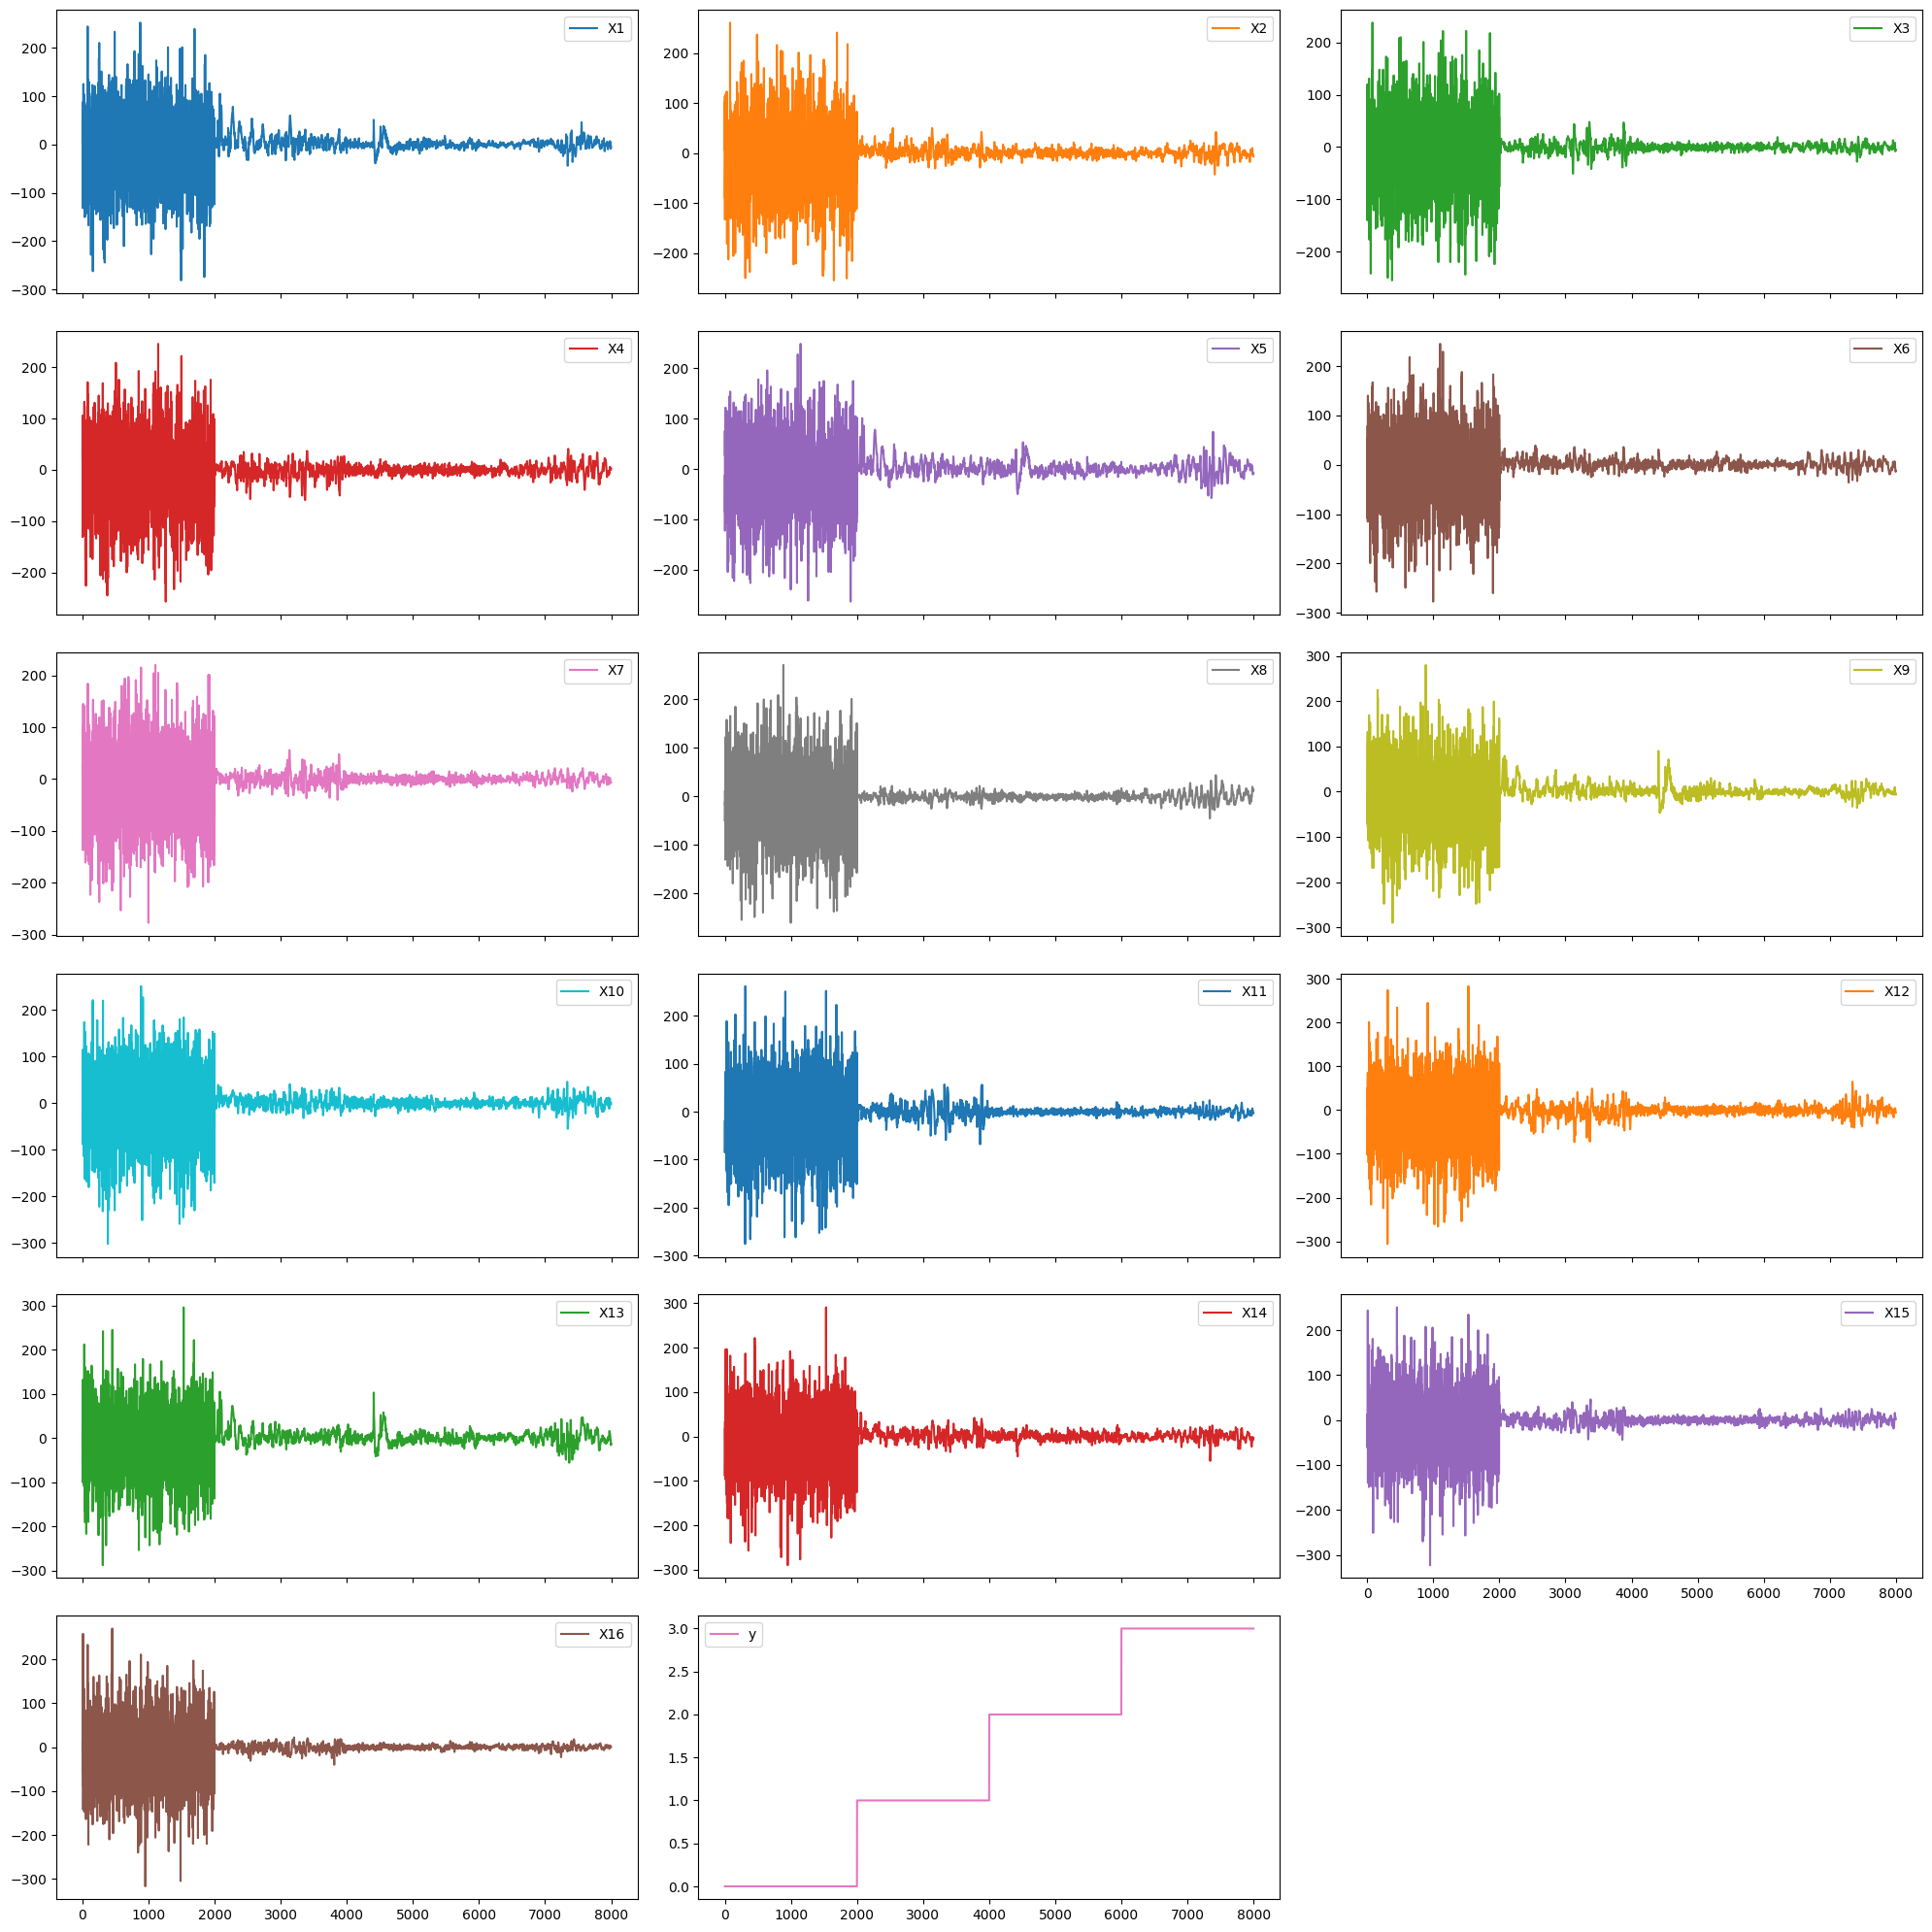

In [8]:
# Plot all features
dataset.plot(subplots=True, layout=(6, 3), figsize=(20, 20))
plt.tight_layout()
plt.show()

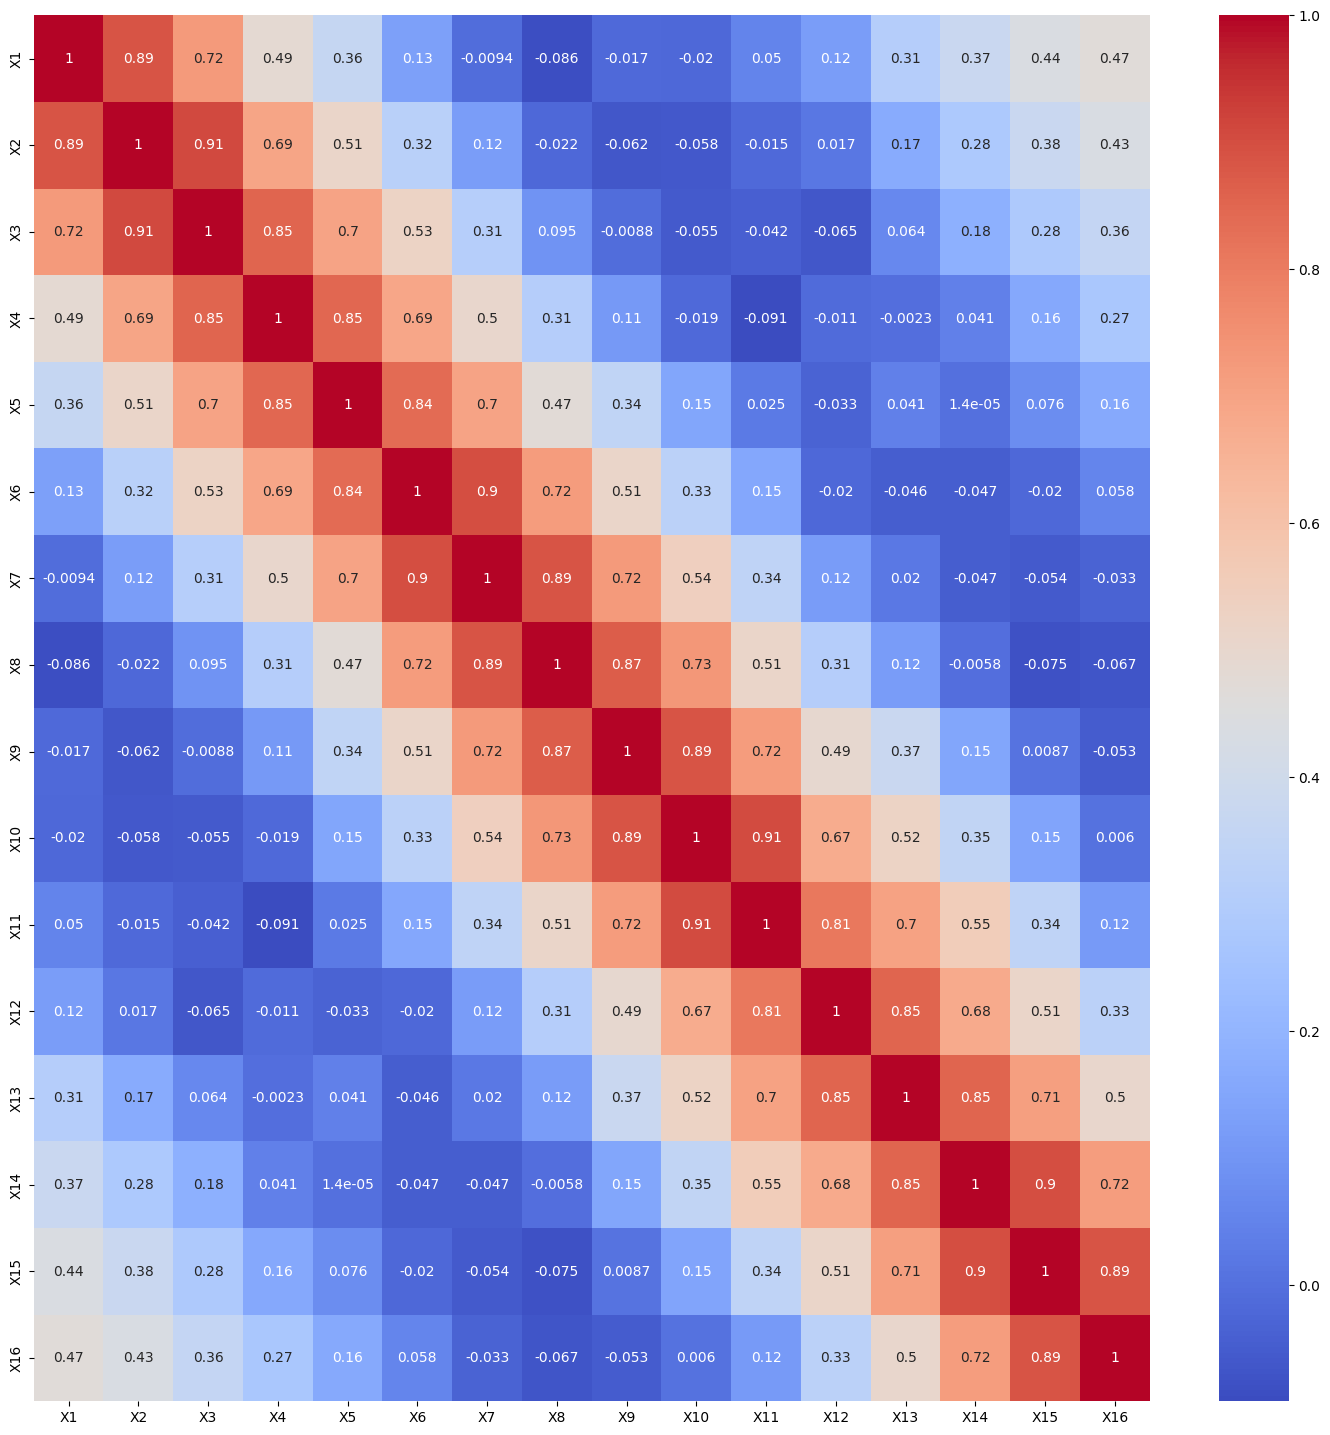

In [9]:
# Correlation between the features
plt.figure(figsize=(18, 18))
sns.heatmap(dataset.drop('y', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

# **3. Data preprocessing**

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# Separate the input features and the target
X = dataset.drop('y', axis=1)
y = dataset['y']

In [22]:
# Split train and test observations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Apply feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Save the train-test splits using numpy
np.savez_compressed(
    "data/training_data/splits.npz",
    X_train=X_train, 
    X_test=X_test,
    y_train=y_train, 
    y_test=y_test
)

In [25]:
# Save X and y using numpy
np.savez_compressed(
    "data/training_data/features_labels.npz",
    X=X, 
    y=y
)